**Project Data Mining & Business Intelligence**


---


Data: https://drive.google.com/file/d/1BbPJGIWhQg-pfVlb6hHze95fLe6U61kF/view?usp=sharing

```
```

Task:

A.Lakukan Proses Mining pada Data yang diberikan.

B. Dari hasil A ada informasi/insight apa saja dari data yang bisa didapatkan.

C. Buat sebuah laporan/presentasi dari hasil B.

```
```
Oleh:


1.  Aristriana Muhamad - 2106709043
2.  Vesya Padmadewi - 2106726926
3.  Farah Ramadhani - 2106654832
4.  Myra Azzahra Putri Syah Indra - 2106726844
5.  Achmad Rizki Baehaki - 2106725066



#Read Dataset

In [ ]:
import pandas as pd, matplotlib.pyplot as plt
import time, numpy as np, seaborn as sns
from sklearn import  tree
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import svm, preprocessing
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
sns.set(style="ticks", color_codes=True)

import re
import missingno as msno
import warnings; warnings.simplefilter('ignore')

'DONE'

'DONE'

In [ ]:
import gdown

In [ ]:
url = "https://drive.google.com/uc?id=1sS09YyejKDjUwIFwV-MqwhfYhmGDCFXb"
path = '/content/data_kesehatan-Mental-SRQ-2023--Filtered.csv'
try:
  df = pd.read_csv(path, sep=';')
except:
  gdown.download(url, path, quiet=False)
  df = pd.read_csv(path, sep=';')

Downloading...
From: https://drive.google.com/uc?id=1sS09YyejKDjUwIFwV-MqwhfYhmGDCFXb
To: /content/data_kesehatan-Mental-SRQ-2023--Filtered.csv
100%|██████████| 195M/195M [00:02<00:00, 74.4MB/s]


In [ ]:
df = pd.read_csv("/content/data_kesehatan-Mental-SRQ-2023--Filtered.csv")
df.head()

,ID,WILAYAH,JENIS KELAMIN,USIA,LAMA BERDINAS,PENDIDIKAN TERAKHIR,TINGGI BADAN,BERAT BADAN,LINGKAR PINGGANG,Status Perkawinan,...,Sumber air bersih di tempat tinggal saudara ?,Penggunaan air bersih untuk makan & minum bersumber dari :,Berapa jarak jamban dengan sumur dirumah saudara ?,Bagaimana saluran pembuangan air (sanitasi) rumah tangga?,Apakah terdapat tempat sampah di sekitar rumah?,Berapa jarak tempat sampah dengan rumah saudara ?,Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga?,Kelompok Umur,NILAI IMT,IMT
0,1,KALBAR,LAKI - LAKI,34.0,16.0,SMA,168.9,85.0,100.0,Menikah,...,Air PAM,Tadah hujan,Lebih dari 12 meter,Ada,"Ada, terbuka",Lebih dari 10 meter,Tidak ada,25 - 34,29.80,Obesitas
1,2,KALBAR,LAKI - LAKI,43.0,23.0,SMA,169.5,70.0,80.0,Menikah,...,Air PAM,Air mineral isi ulang,Lebih dari 12 meter,Ada,"Ada, tertutup",Lebih dari 10 meter,Tidak ada,35 - 44,24.36,Normal
2,3,KALBAR,LAKI - LAKI,21.0,1.0,SMA,169.5,60.0,78.0,Belum Menikah,...,Air PAM,Air mineral isi ulang,Tidak memiliki jamban sehat,Ada,Tidak ada,NaN,Tidak ada,15 - 24,20.88,Normal
3,4,KALBAR,LAKI - LAKI,40.0,23.0,S2,166.8,80.0,34.0,Menikah,...,Air PAM,Air mineral isi ulang,Tidak memiliki jamban sehat,Ada,"Ada, tertutup",Lebih dari 10 meter,Tidak ada,35 - 44,28.75,Obesitas
4,5,KALBAR,LAKI - LAKI,28.0,9.0,SMA,164.5,62.0,32.0,Menikah,...,Air PAM,Air mineral isi ulang,Lebih dari 12 meter,Ada,"Ada, tertutup",Lebih dari 10 meter,Ada,25 - 34,22.91,Normal


#Pre-processing

In [ ]:
data = df.copy()

##Rename Variabel

In [ ]:
data.head()

,ID,WILAYAH,JENIS KELAMIN,USIA,LAMA BERDINAS,PENDIDIKAN TERAKHIR,TINGGI BADAN,BERAT BADAN,LINGKAR PINGGANG,Status Perkawinan,...,Sumber air bersih di tempat tinggal saudara ?,Penggunaan air bersih untuk makan & minum bersumber dari :,Berapa jarak jamban dengan sumur dirumah saudara ?,Bagaimana saluran pembuangan air (sanitasi) rumah tangga?,Apakah terdapat tempat sampah di sekitar rumah?,Berapa jarak tempat sampah dengan rumah saudara ?,Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga?,Kelompok Umur,NILAI IMT,IMT
0,1,KALBAR,LAKI - LAKI,34.0,16.0,SMA,168.9,85.0,100.0,Menikah,...,Air PAM,Tadah hujan,Lebih dari 12 meter,Ada,"Ada, terbuka",Lebih dari 10 meter,Tidak ada,25 - 34,29.80,Obesitas
1,2,KALBAR,LAKI - LAKI,43.0,23.0,SMA,169.5,70.0,80.0,Menikah,...,Air PAM,Air mineral isi ulang,Lebih dari 12 meter,Ada,"Ada, tertutup",Lebih dari 10 meter,Tidak ada,35 - 44,24.36,Normal
2,3,KALBAR,LAKI - LAKI,21.0,1.0,SMA,169.5,60.0,78.0,Belum Menikah,...,Air PAM,Air mineral isi ulang,Tidak memiliki jamban sehat,Ada,Tidak ada,NaN,Tidak ada,15 - 24,20.88,Normal
3,4,KALBAR,LAKI - LAKI,40.0,23.0,S2,166.8,80.0,34.0,Menikah,...,Air PAM,Air mineral isi ulang,Tidak memiliki jamban sehat,Ada,"Ada, tertutup",Lebih dari 10 meter,Tidak ada,35 - 44,28.75,Obesitas
4,5,KALBAR,LAKI - LAKI,28.0,9.0,SMA,164.5,62.0,32.0,Menikah,...,Air PAM,Air mineral isi ulang,Lebih dari 12 meter,Ada,"Ada, tertutup",Lebih dari 10 meter,Ada,25 - 34,22.91,Normal


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289801 entries, 0 to 289800
Data columns (total 79 columns):
 #   Column                                                                                                             Non-Null Count   Dtype  
---  ------                                                                                                             --------------   -----  
 0   ID                                                                                                                 289801 non-null  int64  
 1   WILAYAH                                                                                                            289801 non-null  object 
 2   JENIS KELAMIN                                                                                                      289801 non-null  object 
 3   USIA                                                                                                               289801 non-null  float64
 4   LAMA BERDINAS 

In [ ]:
data = data.rename(columns={
    'WILAYAH': 'Wilayah', 'JENIS KELAMIN': 'Sex', 'USIA': 'Usia', 'LAMA BERDINAS': 'Lama Dinas', 'PENDIDIKAN TERAKHIR': 'Pendidikan Akhir', 'TINGGI BADAN': 'TB', 'BERAT BADAN': 'BB',
    'LINGKAR PINGGANG': 'LP', 'Status Perkawinan': 'Status', 'PENGELUARAN/BULAN': 'Pengeluaran', 'Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?': 'Jantung', 'Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?': 'Stroke',
    'Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?': 'Diabetes Melitus', 'Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?': 'Hipertensi', 'Apakah saudara pernah di diagnosa atau menderita penyakit Kanker ?': 'Kanker',
    'Apakah saudara pernah di diagnosa atau menderita penyakit Ginjal ?': 'Ginjal', 'Apakah saudara pernah di diagnosa atau menderita penyakit Tumor ?': 'Tumor', 'Apakah saudara pernah di diagnosa atau menderita penyakit Osteoartritis ?': 'Osteoartitris',
    'Apakah saudara pernah di diagnosa atau menderita penyakit Lambung ?': 'Lambung', 'Apakah saudara pernah di diagnosa atau menderita penyakit Liver ?': 'Liver',
    'Sering menderita sakit kepala ?': 'Sakit kepala',
    'Tidak nafsu makan ?': 'Tidak nafsu makan',
    'Sulit tidur ?': 'Sulit tidur',
    'Mudah takut ?': 'Mudah takut',
    'Merasa tegang, cemas atau kuatir ?': 'Tegang, cemas atau kuatir',
    'Tangan anda gemetar ?': 'Tangan gemetar',
    'Pencernaan anda terganggu / buruk ?': 'Pencernaan buruk',
    'Sulit untuk berpikir jernih ?': 'Sulit berpikir jernih',
    'Merasa tidak bahagia ?': 'Tidak bahagia',
    'Menangis lebih sering ?': 'Sering menangis',
    'Sulit untuk mengambil keputusan ?': 'Sulit mengambil keputusan',
    'Kehilangan minat pada berbagai hal ?': 'Kehilangan minat',
    'Tidak merasa berharga?': 'Merasa tidak berharga',
    'Mempunyai pikiran untuk mengakhiri hidup?': 'Ingin mengakhiri hidup',
    'Merasa lelah sepanjang waktu?': 'Selalu lelah',
    'Mengalami rasa tidak enak di perut?': 'Sakit perut',
    'Mudah lelah ?': 'Mudah lelah',
    'Apakah saudara menderita penyakit gigi dan mulut (karies/gigi berlubang)': 'Karies',
    'Jika Ya berapa jumlah gigi saudara yang Karies': 'Jumlah karies',
    'Berapa kali saudara olahraga/aktifitas fisik selama seminggu ?': 'Frekuensi olahraga',
    'Seberapa banyak Saudara mengkonsumsi air mineral dalam satu hari?': 'Konsumsi air mineral',
    'Seberapa sering Saudara mengkonsumsi buah dan sayur dalam sehari?': 'Konsumsi buah dan sayur',
    'Dalam 1 hari berapa kali Saudara mandi/ mencuci badan?': 'Frekuensi mandi',
    'Berapa lama saudara mandi ?': 'Lama mandi',
    'Apakah saudara merokok ?': 'Merokok',
    'Jika Ya, Berapa Batang Saudara merokok dalam sehari?': 'Jumlah rokok',
    'Seberapa banyak saudara mengkonsumsi gula/pemanis setiap harinya ?': 'Konsumsi gula',
    'Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?': 'Konsumsi alkohol',
    'Seberapa banyak Saudara mengkonsumsi makanan-makanan junk food dan berminyak dalam sehari': 'Konsumsi junk food',
    'Dalam satu hari berapa kali Saudara membersihkan/ menggosok gigi ?': 'Frekuensi gosok gigi',
    'Berapa lama saudara menggosok gigi ?': 'Lama gosok gigi',
    'Dalam sehari, berapa kali Saudara mengganti pakaian dalam?': 'Frekuensi ganti pakaian dalam',
    'Apakah Saudara selalu mencuci tangan dengan air bersih dan sabun sebelum makan?': 'Cuci tangan sebelum makan',
    'Apakah tempat tinggal Saudara mempunyai penghawaan/sirkulasi udara yang cukup?': 'Sirkulasi cukup',
    'Apakah lingkungan tempat tinggal Saudara saat ini terkontaminasi/ terganggu akibat polusi udara yang tidak sehat?': 'Terkontaminasi polusi udara',
    'Sumber air bersih di tempat tinggal saudara ?': 'Sumber air bersih',
    'Penggunaan air bersih untuk makan & minum bersumber dari : ': 'Sumber air bersih untuk makan dan minum',
    'Apakah terdapat tempat sampah di sekitar rumah? ': 'Tersedia tempat sampah',
    'Berapa jarak jamban dengan sumur dirumah saudara ?': 'Jarak jamban sumur',
    'Bagaimana saluran pembuangan air (sanitasi) rumah tangga?': 'Sanitasi',
    'Berapa jarak tempat sampah dengan rumah saudara ?': 'Jarak tempat sampah',
    'Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga?': 'Terdapat fasum'
})

In [ ]:
data = data.rename(columns={
    'Apakah saudara pernah di diagnosa atau menderita penyakit  Tuberculosis (TBC) ?': 'TBC',
    'Apakah saudara pernah di diagnosa atau menderita penyakit  Demam Berdarah Dengue (DBD) ?': 'DBD',
    'Apakah saudara pernah di diagnosa atau menderita penyakit  COVID-19 ?': 'COVID-19',
    'Apakah saudara pernah di diagnosa atau menderita penyakit  HIV/AIDS ?': 'HIV/AIDS',
    'Apakah saudara pernah di diagnosa atau menderita penyakit  Diare ?': 'Diare',
    'Apakah saudara pernah di diagnosa atau menderita penyakit  Malaria ?': 'Malaria',
    'Apakah saudara pernah di diagnosa atau menderita penyakit  Gonore atau Sipilis ?': 'Gonore atau Sipilis',
    'Apakah saudara pernah di diagnosa atau menderita penyakit  Thypus ?': 'Thypus',
    'Apakah saudara pernah di diagnosa atau menderita penyakit  Dermatitis (Skabies)/ peradangan atau iritasi kulit ?': 'Dermatitis',
    'Apakah saudara pernah di diagnosa atau menderita penyakit  Mikosis (infeksi jamur) ?': 'Mikosis'
})

In [ ]:
data = data.rename(columns={
    'Merasa sulit untuk menikmati kegiatan sehari – hari?': 'Sulit menikmati kegiatan',
    'Pekerjaan anda sehari – hari terganggu ?': 'Pekerjaan terganggu',
    'Tidak mampu melakukan hal – hal yang bermanfaat dalam hidup?': 'Tidak bermanfaat'
})

In [ ]:
data.columns

Index(['ID', 'Wilayah', 'Sex', 'Usia', 'Lama Dinas', 'Pendidikan Akhir', 'TB',
       'BB', 'LP', 'Status', 'Pengeluaran', 'Jantung', 'Stroke',
       'Diabetes Melitus', 'Hipertensi', 'Kanker', 'Ginjal', 'Tumor',
       'Osteoartitris', 'Lambung', 'Liver', 'TBC', 'DBD', 'COVID-19',
       'HIV/AIDS', 'Diare', 'Malaria', 'Gonore atau Sipilis', 'Thypus',
       'Dermatitis', 'Mikosis', 'Sakit kepala', 'Tidak nafsu makan',
       'Sulit tidur', 'Mudah takut', 'Tegang, cemas atau kuatir',
       'Tangan gemetar', 'Pencernaan buruk', 'Sulit berpikir jernih',
       'Tidak bahagia', 'Sering menangis', 'Sulit menikmati kegiatan',
       'Sulit mengambil keputusan', 'Pekerjaan terganggu', 'Tidak bermanfaat',
       'Kehilangan minat', 'Merasa tidak berharga', 'Ingin mengakhiri hidup',
       'Selalu lelah', 'Sakit perut', 'Mudah lelah', 'Karies', 'Jumlah karies',
       'Frekuensi olahraga', 'Konsumsi air mineral', 'Konsumsi buah dan sayur',
       'Frekuensi mandi', 'Lama mandi', 'Merokok', 

##Format penulisan

In [ ]:
for columns in data.columns:
    unique_values = data[columns].unique()
    print(f"Kolom '{columns}': {unique_values}")

Kolom 'ID': [     1      2      3 ... 289799 289800 289801]
Kolom 'Wilayah': ['KALBAR' 'BENGKULU' 'SULSEL' 'SULUT' 'KEPRI' 'NTT' 'JATIM' 'SULTENG'
 'JAMBI' 'SUMUT' 'JABAR' 'ACEH' 'BALI' 'BANTEN' 'DIY' 'GORONTALO' 'JATENG'
 'KALSEL' 'KALTENG' 'KALTIM' 'KALTARA' 'BABEL' 'LAMPUNG' 'MALUKU' 'MALUT'
 'METROJAYA' 'NTB' 'PAPUA' 'PABAR' 'RIAU' 'SULBAR' 'SULTRA' 'SUMBAR'
 'SUMSEL']
Kolom 'Sex': ['LAKI - LAKI' 'PEREMPUAN']
Kolom 'Usia': [3.4000000e+01 4.3000000e+01 2.1000000e+01 4.0000000e+01 2.8000000e+01
 4.7000000e+01 4.1000000e+01 2.3000000e+01 1.9000000e+01 2.2000000e+01
 2.5000000e+01 4.6000000e+01 3.9000000e+01 5.0000000e+01 5.5000000e+01
 2.6000000e+01 4.2000000e+01 3.2000000e+01 4.4000000e+01 3.1000000e+01
 3.7000000e+01 2.4000000e+01 2.7000000e+01 5.7000000e+01 5.3000000e+01
 5.6000000e+01 2.0000000e+01 3.6000000e+01 4.9000000e+01 5.1000000e+01
 2.9000000e+01 5.4000000e+01 3.8000000e+01 4.8000000e+01 4.5000000e+01
 3.0000000e+01 5.2000000e+01 3.5000000e+01 3.3000000e+01 5.8000000e+01
 

###Usia

In [ ]:
#Usia
data['Usia'].astype(str).unique()

array(['34.0', '43.0', '21.0', '40.0', '28.0', '47.0', '41.0', '23.0',
       '19.0', '22.0', '25.0', '46.0', '39.0', '50.0', '55.0', '26.0',
       '42.0', '32.0', '44.0', '31.0', '37.0', '24.0', '27.0', '57.0',
       '53.0', '56.0', '20.0', '36.0', '49.0', '51.0', '29.0', '54.0',
       '38.0', '48.0', '45.0', '30.0', '52.0', '35.0', '33.0', '58.0',
       '15.0', '16.0', '17.0', '5429.0', '18.0', '81.0', '83.0', '59.0',
       '80.0', '85.0', '88.0', '100.0', '64.0', '78.0', '77.0', '67.0',
       '371.0', '79.0', '61.0', '72.0', '5431.0', '68.0', '99.0', '66.0',
       '90.0', '4120.0', '70.0', '442.0', '92.0', '5633.0', '69.0',
       '75.0', '93.0', '87.0', '8011996.0', '97.0', '382.0', '60.0',
       '89.0', '84.0', '422.0', '82.0', '4626.0', '62.0', '4323.0',
       '76.0', '4325.0', '4826.0', '96.0', '86.0', '65.0', '63.0', '73.0',
       '30.03', '2910.0', '298.0', '21071984.0', '71.0', '4927.0',
       '4220.0', '4222.0', '533.0', '5736.0', '4020.0', '4822.0', '95.0',
     

In [ ]:
data['Usia'] = data['Usia'].astype(str).str.replace(r'\.0$', '', regex=True)

In [ ]:
data['Usia'] = data['Usia'].astype(str).apply(lambda x: x[-4:] if len(x) > 3 else x)

In [ ]:
data['Usia'].unique()

array(['34', '43', '21', '40', '28', '47', '41', '23', '19', '22', '25',
       '46', '39', '50', '55', '26', '42', '32', '44', '31', '37', '24',
       '27', '57', '53', '56', '20', '36', '49', '51', '29', '54', '38',
       '48', '45', '30', '52', '35', '33', '58', '15', '16', '17', '5429',
       '18', '81', '83', '59', '80', '85', '88', '100', '64', '78', '77',
       '67', '371', '79', '61', '72', '5431', '68', '99', '66', '90',
       '4120', '70', '442', '92', '5633', '69', '75', '93', '87', '1996',
       '97', '382', '60', '89', '84', '422', '82', '4626', '62', '4323',
       '76', '4325', '4826', '96', '86', '65', '63', '73', '0.03', '2910',
       '298', '1984', '71', '4927', '4220', '4222', '533', '5736', '4020',
       '4822', '95', '1967', '553', '1982', '381', '2619', '94', '2022',
       '74', '4621', '1979', '370', '2525', '2023', '5333', '0701', '522',
       '279', '1992', '1987', '5129', '401', '1981', '191'], dtype=object)

In [ ]:
data['Usia'] = pd.to_numeric(data['Usia'], errors='coerce')
data['Usia'] = data['Usia'].apply(lambda x: 2023 - x if 1000 < x < 2023 else x)

###Lama Dinas

In [ ]:
#Lama Dinas
data['Lama Dinas'].astype(str).unique()

array(['16.0', '23.0', '1.0', '9.0', '25.0', '20.0', '10.0', '3.0', '2.0',
       '29.0', '28.0', '34.0', '7.0', '19.0', '33.0', '24.0', '22.0',
       '26.0', '11.0', '18.0', '4.0', '5.0', '6.0', '31.0', '8.0', '27.0',
       '32.0', '17.0', '13.0', '30.0', '21.0', '0.0', '35.0', '15.0',
       '1.5', '36.0', '1.6', '52.0', '44.0', '37.0', '16.7', '1.7',
       '38.0', '43.0', '47.0', '55.0', '41.0', '54.0', '97.0', '51.0',
       '48.0', '58.0', '39.0', '53.0', '56.0', '14.0', '57.0', '12.0',
       '46.0', '42.0', '90.0', '99.0', '50.0', '87.0', '45.0', '49.0',
       '40.0', '93.0', '80.0', '1998.0', '2004.0', '98.0', '96.0',
       '2001.0', '91.0', '2006.0', '95.0', '94.0', '88.0', '76.0',
       '2015.0', '2013.0', '8.5', '86.0', '2012.0', '7.5', '0.7', '92.0',
       '17.5', '60.0', '25.1', '2027.0', '2021.0', '3.5', '89.0', '6.5',
       '19.5', '1993.0', '9.5', '75.0', '1.8', '22.6', '2008.0', '2018.0',
       '2022.0', '22122021.0', '2003.0', '4.5', '2016.0', '81.0', '0.3',


In [ ]:
data['Lama Dinas'] = data['Lama Dinas'].astype(str).str.replace(r'\.0$', '', regex=True)

In [ ]:
data['Lama Dinas'] = data['Lama Dinas'].astype(str).apply(lambda x: x[-4:] if len(x) > 3 else x)

In [ ]:
data['Lama Dinas'].unique()

array(['16', '23', '1', '9', '25', '20', '10', '3', '2', '29', '28', '34',
       '7', '19', '33', '24', '22', '26', '11', '18', '4', '5', '6', '31',
       '8', '27', '32', '17', '13', '30', '21', '0', '35', '15', '1.5',
       '36', '1.6', '52', '44', '37', '16.7', '1.7', '38', '43', '47',
       '55', '41', '54', '97', '51', '48', '58', '39', '53', '56', '14',
       '57', '12', '46', '42', '90', '99', '50', '87', '45', '49', '40',
       '93', '80', '1998', '2004', '98', '96', '2001', '91', '2006', '95',
       '94', '88', '76', '2015', '2013', '8.5', '86', '2012', '7.5',
       '0.7', '92', '17.5', '60', '25.1', '2027', '2021', '3.5', '89',
       '6.5', '19.5', '1993', '9.5', '75', '1.8', '22.6', '2008', '2018',
       '2022', '2003', '4.5', '2016', '81', '0.3', '19.6', '2000', '1999',
       '78', '2007', '19.3', '2005', '2002', '2014', '1997', '22.7', '85',
       '64', '70', '0.5', '100', '9.7', '23.6', '7.6', '72', '82', '2020',
       '15.6', '84', '2.5', '22.5', '0.6', '83'

In [ ]:
data['Lama Dinas'] = pd.to_numeric(data['Lama Dinas'], errors='coerce')
data['Lama Dinas'] = data['Lama Dinas'].apply(lambda x: 2023 - x if 1000 < x < 2023 else x)

###Tinggi Badan

In [ ]:
data['TB'].astype(str).unique()

array(['168.9', '169.5', '166.8', '164.5', '165.5', '168.5', '175',
       '172.5', '166.5', '166', '172', '167', '175.8', '163.5', '167.8',
       '72.5', '168.8', '174.5', '161', '172.6', '160.5', '175.5',
       '171.5', '17', '165', '170', '150', '165.9', '156', '168', '167.5',
       '166.3', '159.5', '169', '173.5', '171', '1.65', '166.9', '176.5',
       '1.71', '166.6', '1.76', '171.3', '156.5', '157.5', '17,1 ', '160',
       '1.75', '1.66', '1.72', '1.68', '162.5', '17,5', '177.5', '169.2',
       '178', '176', '180.5', '16,6', '1.7', '178.5', '167.2', '171.8',
       '170.3', '165.4', '1.69', '173.4', '170.2', '15,5', '182', '158.5',
       '185.5', '158', '164.4', '165.7', '167.6', '1.64', '161.5',
       '179.5', '165.58', '169.7', '168.2', '1.77', '173', '170.5',
       '17,6', '163', '16,7', '164', '171.6', '176.6', '16.39', '188.5',
       '173.8', '172.8', '164.7', '155', '174.8', '168.58', '5', '174',
       '153', '180', '181', '16', '177', '162', '159', '187', '15',

In [ ]:
data['TB'] = data['TB'].astype(str).str.replace(',', '.', regex=True)

In [ ]:
data['TB'] = pd.to_numeric(data['TB'], errors='coerce')
data['TB'] = data['TB'].apply(lambda x: x*100 if x < 2 else x)
data['TB'] = data['TB'].apply(lambda x: x*2.54 if x < 100 else x)
data['TB'] = data['TB'].apply(lambda x: x/10 if x > 900 else x)
data['TB'].unique()

array([168.9   , 169.5   , 166.8   , 164.5   , 165.5   , 168.5   ,
       175.    , 172.5   , 166.5   , 166.    , 172.    , 167.    ,
       175.8   , 163.5   , 167.8   , 184.15  , 168.8   , 174.5   ,
       161.    , 172.6   , 160.5   , 175.5   , 171.5   ,  43.18  ,
       165.    , 170.    , 150.    , 165.9   , 156.    , 168.    ,
       167.5   , 166.3   , 159.5   , 169.    , 173.5   , 171.    ,
       166.9   , 176.5   , 166.6   , 176.    , 171.3   , 156.5   ,
       157.5   ,  43.434 , 160.    , 162.5   ,  44.45  , 177.5   ,
       169.2   , 178.    , 180.5   ,  42.164 , 178.5   , 167.2   ,
       171.8   , 170.3   , 165.4   , 173.4   , 170.2   ,  39.37  ,
       182.    , 158.5   , 185.5   , 158.    , 164.4   , 165.7   ,
       167.6   , 164.    , 161.5   , 179.5   , 165.58  , 169.7   ,
       168.2   , 177.    , 173.    , 170.5   ,  44.704 , 163.    ,
        42.418 , 171.6   , 176.6   ,  41.6306, 188.5   , 173.8   ,
       172.8   , 164.7   , 155.    , 174.8   , 168.58  ,  12.7

###Berat Badan

In [ ]:
data['BB'].astype(str).unique()

array(['85.0', '70.0', '60.0', '80.0', '62.0', '63.0', '71.0', '69.55',
       '74.0', '82.0', '53.0', '54.5', '70.65', '78.0', '72.0', '65.0',
       '75.0', '84.0', '68.0', '89.0', '57.5', '50.0', '73.0', '45.5',
       '58.0', '56.0', '52.5', '6.77', '59.5', '83.0', '67.0', '66.5',
       '73.5', '69.0', '76.0', '52.0', '90.0', '98.0', '87.0', '83.5',
       '59.0', '86.0', '95.0', '79.0', '75.5', '66.0', '78.5', '69.5',
       '77.3', '62.5', '85.2', '92.0', '54.0', '71.6', '68.5', '51.5',
       '87.6', '58.5', '80.1', '55.0', '62.1', '71.8', '70.5', '115.0',
       '63.5', '57.0', '88.0', '98.5', '64.0', '71.2', '81.0', '7041.0',
       '94.0', '95.8', '56.5', '84.6', '7836.0', '60.8', '64.4', '68.9',
       '53.8', '90.7', '180.0', '179.0', '176.0', '175.0', '173.0',
       '172.0', '171.0', '170.0', '169.0', '168.0', '167.0', '166.0',
       '165.0', '164.0', '163.0', '152.0', '110.0', '100.0', '90210.0',
       '82777.0', '82102.0', '90105.0', '70890.0', '73100.0', '70125.0',


In [ ]:
data['BB'] = data['BB'].astype(str).str.replace(',', '.', regex=True)

In [ ]:
# ada kemungkinan konversi ke kg, gram dan ons
data['BB'] = pd.to_numeric(data['BB'], errors='coerce')
data['BB'] = data['BB'].astype('float64')
data['BB'] = data['BB'].apply(lambda x: x*10 if x < 5 else x)
data['BB'] = data['BB'].apply(lambda x: x/10 if 350< x <3500 else x)
data['BB'] = data['BB'].apply(lambda x: x/1000 if x > 35000 else x)
data['BB'] = data['BB'].apply(lambda x: x/100 if 3500 < x <35000 else x)
data['BB'].unique()

array([ 85.   ,  70.   ,  60.   ,  80.   ,  62.   ,  63.   ,  71.   ,
        69.55 ,  74.   ,  82.   ,  53.   ,  54.5  ,  70.65 ,  78.   ,
        72.   ,  65.   ,  75.   ,  84.   ,  68.   ,  89.   ,  57.5  ,
        50.   ,  73.   ,  45.5  ,  58.   ,  56.   ,  52.5  ,   6.77 ,
        59.5  ,  83.   ,  67.   ,  66.5  ,  73.5  ,  69.   ,  76.   ,
        52.   ,  90.   ,  98.   ,  87.   ,  83.5  ,  59.   ,  86.   ,
        95.   ,  79.   ,  75.5  ,  66.   ,  78.5  ,  69.5  ,  77.3  ,
        62.5  ,  85.2  ,  92.   ,  54.   ,  71.6  ,  68.5  ,  51.5  ,
        87.6  ,  58.5  ,  80.1  ,  55.   ,  62.1  ,  71.8  ,  70.5  ,
       115.   ,  63.5  ,  57.   ,  88.   ,  98.5  ,  64.   ,  71.2  ,
        81.   ,  70.41 ,  94.   ,  95.8  ,  56.5  ,  84.6  ,  78.36 ,
        60.8  ,  64.4  ,  68.9  ,  53.8  ,  90.7  , 180.   , 179.   ,
       176.   , 175.   , 173.   , 172.   , 171.   , 170.   , 169.   ,
       168.   , 167.   , 166.   , 165.   , 164.   , 163.   , 152.   ,
       110.   , 100.

###IMT

In [ ]:
data['NILAI IMT'].astype(str).unique()

array(['29.80', '24.36', '20.88', ..., '5.25', '1.72', '34.2'],
      dtype=object)

In [ ]:
data['NILAI IMT']

0         29.80
1         24.36
2         20.88
3         28.75
4         22.91
          ...  
289796    21.01
289797    24.97
289798     1.72
289799    17.17
289800     34.2
Name: NILAI IMT, Length: 289801, dtype: object

In [ ]:
data['NILAI IMT'] = pd.to_numeric(data['NILAI IMT'], errors='coerce')
data['NILAI IMT'] = data['NILAI IMT'].astype('float64')
data['NILAI IMT'] = data['NILAI IMT'].apply(lambda x: x*10 if x < 10 else x)

##Tipe data

In [ ]:
#Mengubah tipe data
data['Usia'] = data['Usia'].astype('float64')
data['Lama Dinas']=pd.to_numeric(data['Lama Dinas'], errors='coerce').astype(float)
data['TB']=pd.to_numeric(data['TB'], errors='coerce').astype(float)
data['BB']=pd.to_numeric(data['BB'], errors='coerce').astype(float)
data['LP']=pd.to_numeric(data['LP'], errors='coerce').astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289801 entries, 0 to 289800
Data columns (total 79 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   ID                                       289801 non-null  int64  
 1   Wilayah                                  289801 non-null  object 
 2   Sex                                      289801 non-null  object 
 3   Usia                                     289801 non-null  float64
 4   Lama Dinas                               289801 non-null  float64
 5   Pendidikan Akhir                         289801 non-null  object 
 6   TB                                       289801 non-null  float64
 7   BB                                       289801 non-null  float64
 8   LP                                       289801 non-null  float64
 9   Status                                   289801 non-null  object 
 10  Pengeluaran                     

## Missing values

In [ ]:
persentase_missingvalues = data.isnull().sum() * 100 / len(data)
mv = pd.DataFrame({'column name': data.columns, 'missing values (%)': persentase_missingvalues})
mv[mv['missing values (%)'] > 0]

,column name,missing values (%)
Jumlah karies,Jumlah karies,77.206083
Jumlah rokok,Jumlah rokok,52.637154
Lama gosok gigi,Lama gosok gigi,0.613870
Jarak tempat sampah,Jarak tempat sampah,14.371586
NILAI IMT,NILAI IMT,0.002415


In [ ]:
# Drop kolom ID
data = data.drop(columns=['ID'])

#Imputasi Jumlah Karies
data['Jumlah karies'].fillna('Tidak diketahui', inplace=True)

# Imputasi kolom dengan 'tidak diketauhi'
data['Jumlah rokok'].fillna('Tidak diketahui', inplace=True)
data['Jarak tempat sampah'].fillna('Tidak diketahui', inplace=True)

# Imputasi kolom dengan mean (dist. normal)
data['NILAI IMT'].fillna(data['NILAI IMT'].mean(), inplace=True)

In [ ]:
#Imputasi kolom dengan modus
modus_imt = data['Lama gosok gigi'].mode()[0]
data['Lama gosok gigi'].fillna(modus_imt, inplace=True)

In [ ]:
persentase_missingvalues = data.isnull().sum()*100/len(data)
mv = pd.DataFrame({'column name': data.columns, 'missing values (%)': persentase_missingvalues})
mv[mv['missing values (%)']>0]

,column name,missing values (%)


##Data Duplicate

In [ ]:
data.duplicated().sum()

8

In [ ]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [ ]:
data.describe()

,Usia,Lama Dinas,TB,BB,LP,NILAI IMT
count,289793.000000,289793.000000,289793.000000,289793.000000,289793.000000,289793.000000
mean,37.373077,16.869159,169.414558,73.359185,65.557628,50.543173
std,40.245808,10.377061,5.775533,11.210645,188.432841,2100.098799
min,0.030000,0.000000,12.700000,6.770000,-75.000000,3.700000
25%,29.000000,9.000000,167.000000,66.000000,36.000000,23.310000
50%,38.000000,18.000000,170.000000,72.000000,73.000000,25.100000
75%,44.000000,23.000000,172.000000,80.000000,84.000000,27.550000
max,5736.000000,2027.000000,575.000000,202.200000,100000.000000,318877.550000


## Outliers

In [ ]:
numeric_columns = data.select_dtypes(include=['number']).columns
outlier_dataframes = {}

non_outlier_dataframes = {}
for column_name in numeric_columns:
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    non_outliers = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]

    outlier_dataframes[column_name] = outliers
    non_outlier_dataframes[column_name] = non_outliers

for column_name, outlier_df in outlier_dataframes.items():
    print(f"Outliers in column '{column_name}':")
    print(outlier_df.head())

Outliers in column 'Usia':
     Wilayah          Sex    Usia  Lama Dinas Pendidikan Akhir      TB  \
1302  KALBAR    PEREMPUAN  5429.0        29.0              SMA  158.00   
1870     NTT  LAKI - LAKI    81.0        20.0              SMA  175.26   
2316   MALUT  LAKI - LAKI    83.0        20.0              SMA  175.00   
2607   JABAR  LAKI - LAKI    80.0        21.0              SMA  173.00   
3937     NTT  LAKI - LAKI    85.0        20.0              SMA  175.00   

          BB    LP   Status             Pengeluaran  ... Sumber air bersih  \
1302   50.67  67.0  Menikah  Rp. 2 Juta s.d. 6 Juta  ...           Air PAM   
1870   73.00  34.0  Menikah  Rp. 2 Juta s.d. 6 Juta  ...           Air PAM   
2316  185.00  75.0  Menikah  Rp. 2 Juta s.d. 6 Juta  ...           Air PAM   
2607  173.00  74.0  Menikah  Rp. 2 Juta s.d. 6 Juta  ...        Sumur/Kali   
3937  110.00  90.0  Menikah  Rp. 2 Juta s.d. 6 Juta  ...           Air PAM   

     Sumber air bersih untuk makan dan minum           Jara

In [ ]:
data = non_outliers

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

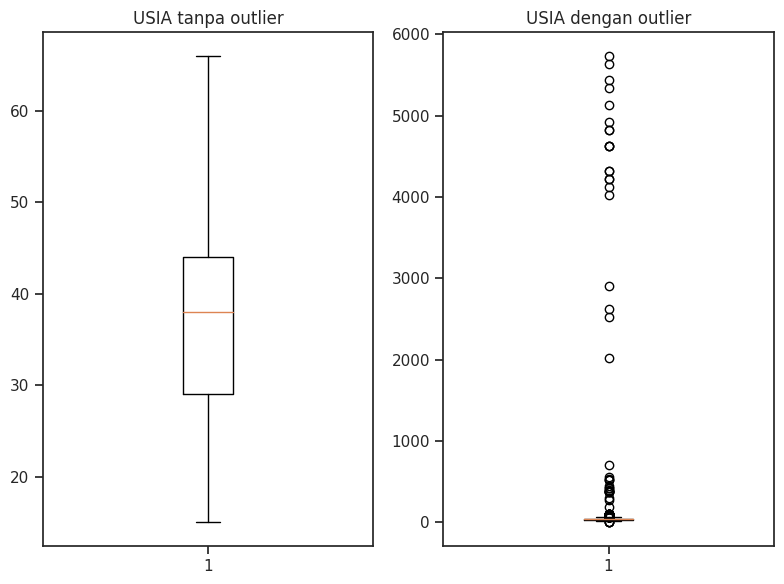

In [ ]:
Q1 = data['Usia'].quantile(0.25)
Q3 = data['Usia'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((data['Usia'] < lower_bound) | (data['Usia'] > upper_bound))

file_data = data[~outliers]

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.boxplot(file_data['Usia'])
plt.title('USIA tanpa outlier')

plt.subplot(1, 2, 2)
plt.boxplot(data['Usia'])
plt.title('USIA dengan outlier')

plt.tight_layout()
plt.show()

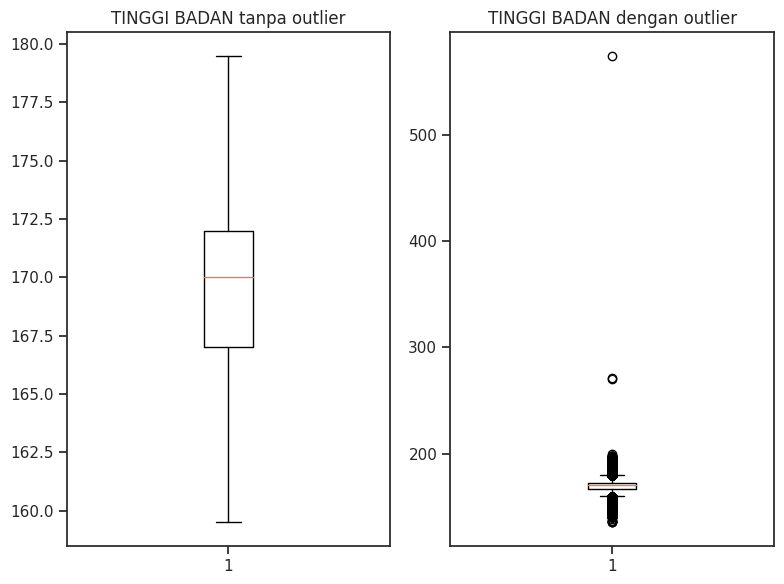

In [ ]:
Q1 = data['TB'].quantile(0.25)
Q3 = data['TB'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((data['TB'] < lower_bound) | (data['TB'] > upper_bound))

file_data = data[~outliers]

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.boxplot(file_data['TB'])
plt.title('TINGGI BADAN tanpa outlier')

plt.subplot(1, 2, 2)
plt.boxplot(data['TB'])
plt.title('TINGGI BADAN dengan outlier')

plt.tight_layout()
plt.show()

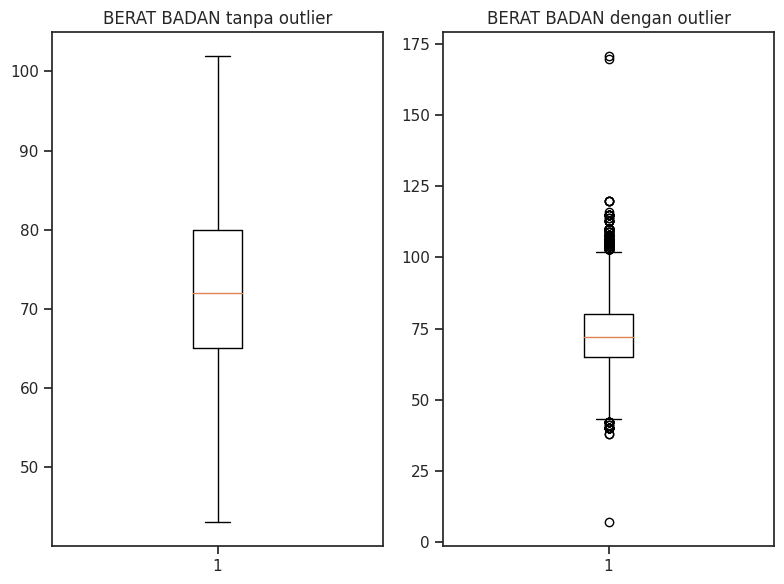

In [ ]:
Q1 = data['BB'].quantile(0.25)
Q3 = data['BB'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((data['BB'] < lower_bound) | (data['BB'] > upper_bound))

file_data = data[~outliers]

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.boxplot(file_data['BB'])
plt.title('BERAT BADAN tanpa outlier')

plt.subplot(1, 2, 2)
plt.boxplot(data['BB'])
plt.title('BERAT BADAN dengan outlier')

plt.tight_layout()
plt.show()

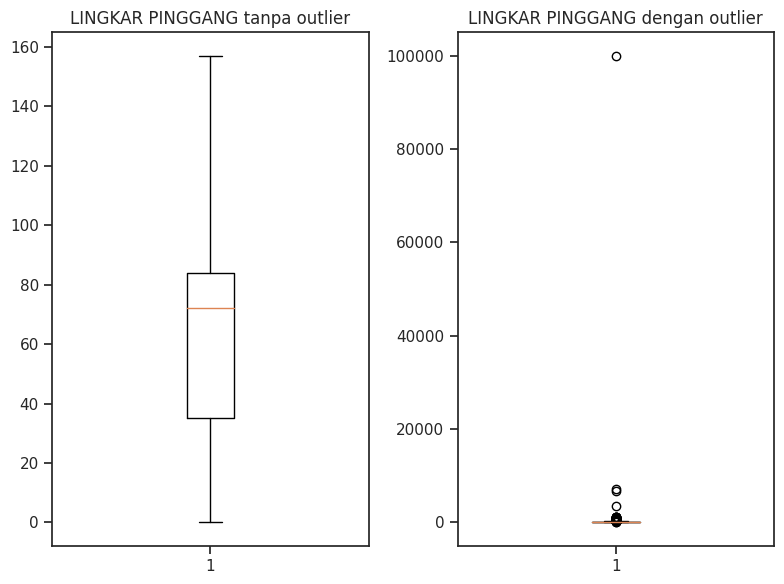

In [ ]:
Q1 = data['LP'].quantile(0.25)
Q3 = data['LP'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((data['LP'] < lower_bound) | (data['LP'] > upper_bound))

file_data = data[~outliers]

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.boxplot(file_data['LP'])
plt.title('LINGKAR PINGGANG tanpa outlier')

plt.subplot(1, 2, 2)
plt.boxplot(data['LP'])
plt.title('LINGKAR PINGGANG dengan outlier')

plt.tight_layout()
plt.show()

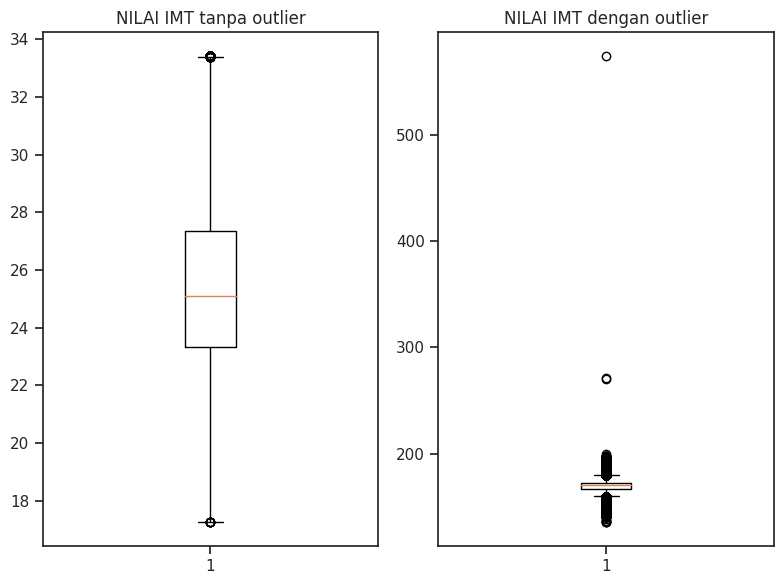

In [ ]:
Q1 = data['NILAI IMT'].quantile(0.25)
Q3 = data['NILAI IMT'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((data['NILAI IMT'] < lower_bound) | (data['NILAI IMT'] > upper_bound))

file_data = data[~outliers]

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.boxplot(file_data['NILAI IMT'])
plt.title('NILAI IMT tanpa outlier')

plt.subplot(1, 2, 2)
plt.boxplot(data['TB'])
plt.title('NILAI IMT dengan outlier')

plt.tight_layout()
plt.show()

In [ ]:
file_data.describe()

,Usia,Lama Dinas,TB,BB,LP,NILAI IMT
count,283078.000000,283078.000000,283078.000000,283078.000000,283078.000000,283078.000000
mean,37.258604,16.767057,169.439473,72.722951,65.253707,25.305572
std,39.411489,10.380218,4.801994,9.413377,190.586739,2.908260
min,0.030000,0.000000,135.000000,6.770000,-75.000000,17.240000
25%,29.000000,9.000000,167.000000,65.000000,35.000000,23.310000
50%,38.000000,18.000000,170.000000,72.000000,72.000000,25.100000
75%,44.000000,23.000000,172.000000,80.000000,84.000000,27.340000
max,5736.000000,2027.000000,271.000000,171.000000,100000.000000,33.430000


In [ ]:
from google.colab import files

file_data.to_csv('preprocesseddata.csv', sep=',', index=False)

In [ ]:
data1 = data.copy()

#EDA

## Statistika Deskriptif

In [ ]:
data.describe()

## Visualisasi distribusi data

In [ ]:
print(data.groupby(['Wilayah'])[['Merokok']].count().transpose())
print()
print(data.groupby(['Sex'])[['Wilayah']].count().transpose())
print()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
fig, ax = plt.subplots()
Sex_counts = data['Sex'].value_counts()
plt.pie(Sex_counts, labels=Sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'pink'])
ax.set_ylabel('Count')
ax.set_title('Gender Distribution')
plt.show()

In [ ]:
Usia_counts = data['Kelompok Umur'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(Usia_counts, labels=Usia_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("husl", 8))
ax.set_ylabel('Count')
ax.set_title('Age Distribution')
plt.show()

In [ ]:
pengeluaran_counts = data['Pengeluaran'].value_counts()

# Sort the values in descending order
pengeluaran_counts = pengeluaran_counts.sort_values(ascending=False)

# Create the bar chart
fig, ax_pengeluaran = plt.subplots(figsize=(14, 6))
bars = pengeluaran_counts.plot(kind='bar', color='pink', ax=ax_pengeluaran)


# Add data labels on top of each bar
for bar in bars.patches:
    ax_pengeluaran.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05,
                    f'{int(bar.get_height())}', ha='center', color='black', fontsize=10)

# Set plot labels and title
plt.title('Distribusi pengeluaran')
plt.xlabel('pengeluaran')
plt.ylabel('Jumlah')
ax_pengeluaran.set_xticklabels(ax_pengeluaran.get_xticklabels(), rotation=45, ha='right')

plt.show()

In [ ]:
wilayah_counts = data['Wilayah'].value_counts()

# Sort the values in descending order
wilayah_counts = wilayah_counts.sort_values(ascending=False)

# Get the top 5 values
top_wilayah = wilayah_counts.head(5)

# Create the bar chart
fig, ax_wilayah = plt.subplots(figsize=(14, 6))
bars = wilayah_counts.plot(kind='bar', color='pink', ax=ax_wilayah)

# Highlight the top 5 values in a different color
for bar in bars.patches:
    if bar.get_height() in top_wilayah.values:
        bar.set_color('gold')

# Add data labels on top of each bar
for bar in bars.patches:
    ax_wilayah.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05,
                    f'{int(bar.get_height())}', ha='center', color='black', fontsize=10)

# Set plot labels and title
plt.title('Distribusi Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah')
ax_wilayah.set_xticklabels(ax_wilayah.get_xticklabels(), rotation=45, ha='right')

plt.show()

In [ ]:
status_counts = data['Status'].value_counts()

plt.figure(figsize=(4, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("husl", 8))
plt.title('Distribusi Status Perkawinan')

plt.show()

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.countplot(x="Pendidikan Akhir", data=data, palette="Paired")

plt.title('Distribusi Pendidikan Akhir')
plt.xlabel('Pendidikan Akhir')
plt.ylabel('Jumlah')

plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
lamadinas_counts = data['Lama Dinas'].value_counts()

# Sort the values in descending order
lamadinas_counts = lamadinas_counts.sort_values(ascending=False)

# Get the top 20 values
top_lamadinas = lamadinas_counts.head(20)

# Create the bar chart
fig, ax_lamadinas = plt.subplots(figsize=(10, 6))
bars = top_lamadinas.plot(kind='bar', color='pink', ax=ax_lamadinas)

# Highlight the top 5 values in a different color
for i, bar in enumerate(bars.patches):
    if top_lamadinas.index[i] in top_lamadinas.head(5).index:
        bar.set_color('gold')

# Add data labels on top of each bar
for bar in bars.patches:
    ax_lamadinas.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05,
                       f'{int(bar.get_height())}', ha='center', color='black', fontsize=10)

# Set plot labels and title
plt.title('Persebaran Lama Dinas (Top 20)')
plt.xlabel('Lama Dinas')
plt.ylabel('Jumlah')
ax_lamadinas.set_xticklabels(ax_lamadinas.get_xticklabels(), rotation=45, ha='right')

plt.show()

In [ ]:
print(sns.countplot(data=data, y='Merokok'))

In [ ]:
print(sns.countplot(data=data, y='Sulit tidur'))

In [ ]:
print(sns.countplot(data=data, y='Stroke'))

In [ ]:
print(sns.countplot(data=data, y='Kanker'))

In [ ]:
print(sns.countplot(data=data, y='Ginjal'))

In [ ]:
print(sns.countplot(data=data, y='Tumor'))

In [ ]:
print(sns.countplot(data=data, y='HIV/AIDS'))

In [ ]:
print(sns.countplot(data=data, y='Dermatitis'))

In [ ]:
print(sns.countplot(data=data, y='Sering menangis'))

In [ ]:
print(sns.countplot(data=data, y='Tidak bermanfaat'))

In [ ]:
print(sns.countplot(data=data, y='Ingin mengakhiri hidup'))

In [ ]:
print(sns.countplot(data=data, y='Tangan gemetar'))

In [ ]:
sns.set(style="whitegrid")
sns.counterplot_counts = data.groupby(['Wilayah', 'IMT']).size().unstack(fill_value=0)
sns.counterplot_counts.plot(kind='bar', stacked=False, colormap='Paired', figsize=(15,6))
plt.title('Distribusi Kategori IMT berdasarkan Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah')

plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='IMT', hue='Konsumsi gula', data=data, palette='viridis')
plt.title('Hubungan antara Kategori IMT dan Konsumsi Gula')
plt.xlabel('Kategori IMT')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
obesitas_wilayah = data[data['IMT']=='Obesitas'].groupby('Wilayah').size() / data.groupby('Wilayah').size() * 100

obesitas_wilayah = obesitas_wilayah.sort_values(ascending=False)

top_obesitas_wilayah = obesitas_wilayah.head(3)

fig, ax_obesitas = plt.subplots(figsize=(15, 6))
bars = obesitas_wilayah.plot(kind='bar', color='pink', ax=ax_obesitas)

# Highlight top 3 value
for bar in bars.patches:
    if bar.get_height() in top_obesitas_wilayah.values:
        bar.set_color('gold')

for bar in bars.patches:
    ax_obesitas.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05,
                      f'{int(bar.get_height())}%', ha='center', color='black', fontsize=10)

plt.title('Persentase Obesitas Berdasarkan Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Persentase')
ax_obesitas.set_xticklabels(ax_obesitas.get_xticklabels(), rotation=45, ha='right')
plt.show()

In [ ]:
imt_diabetes = data.groupby(['Diabetes Melitus', 'IMT']).size().unstack(fill_value=0)
imt_diabetes = imt_diabetes.div(imt_diabetes.sum(axis=1), axis=0) * 100
order = ['Ya', 'Tidak']

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Diabetes Melitus', y='Persentase', hue='IMT',
                 data=imt_diabetes.loc[order].reset_index().melt(id_vars='Diabetes Melitus', var_name='IMT', value_name='Persentase'),
                 palette='Paired', edgecolor='w')

plt.title('Persentase Kategori IMT dengan diabetes melitus')
plt.xlabel('Penderita Diabetes Melitus')
plt.ylabel('Persentase')

plt.legend(title='Kategori IMT', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Diabetes Melitus', hue='Konsumsi gula', data=data, palette='viridis')
plt.title('Hubungan antara Diabetes Melitus dan Konsumsi Gula')
plt.xlabel('Diabetes Melitus')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
imt_bahagia = data.groupby(['Tidak bahagia', 'IMT']).size().unstack(fill_value=0)
imt_bahagia = imt_bahagia.div(imt_bahagia.sum(axis=1), axis=0) * 100
order = ['Tidak', 'Kadang - kadang','Ya']

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Tidak bahagia', y='Persentase', hue='IMT',
                 data=imt_bahagia.loc[order].reset_index().melt(id_vars='Tidak bahagia', var_name='IMT', value_name='Persentase'),
                 palette='Paired', edgecolor='w')

plt.title('Persentase Kategori IMT dengan tidak bahagia')
plt.xlabel('Perasaan tidak bahagia')
plt.ylabel('Persentase')

plt.legend(title='Kategori IMT', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
kebiasaanolahraga_counts = data['Frekuensi olahraga'].value_counts()

plt.figure(figsize=(4, 8))
plt.pie(kebiasaanolahraga_counts, labels=kebiasaanolahraga_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("husl", 8))
plt.title('Distribusi Kebiasaan Olahraga')

plt.show()

In [ ]:
imt_olahraga = data.groupby(['Frekuensi olahraga', 'IMT']).size().unstack(fill_value=0)
imt_olahraga = imt_olahraga.div(imt_olahraga.sum(axis=1), axis=0) * 100
order = ['Tidak pernah', 'Kurang dari 4 kali dalam seminggu', '4 kali atau lebih dalam seminggu']

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Frekuensi olahraga', y='Persentase', hue='IMT',
                 data=imt_olahraga.loc[order].reset_index().melt(id_vars='Frekuensi olahraga', var_name='IMT', value_name='Persentase'),
                 palette='Paired', edgecolor='w')

plt.title('Persentase Kategori IMT Berdasarkan Kebiasaan Olahraga')
plt.xlabel('Kebiasaan Olahraga')
plt.ylabel('Persentase')

plt.legend(title='Kategori IMT', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [ ]:
junkfood_counts = data['Konsumsi junk food'].value_counts()

plt.figure(figsize=(4, 8))
plt.pie(junkfood_counts, labels=junkfood_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("husl", 8))
plt.title('Distribusi Konsumsi junk food')

plt.show()

In [ ]:
imt_junkfood = data.groupby(['Konsumsi junk food', 'IMT']).size().unstack(fill_value=0)
imt_junkfood = imt_junkfood.div(imt_junkfood.sum(axis=1), axis=0) * 100
order = ['Tidak pernah', '1 - 2 kali/hari', 'Di atas 2 kali/hari']

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Konsumsi junk food', y='Persentase', hue='IMT',
                 data=imt_junkfood.loc[order].reset_index().melt(id_vars='Konsumsi junk food', var_name='IMT', value_name='Persentase'),
                 palette='Paired', edgecolor='w')

plt.title('Persentase Kategori IMT Berdasarkan Kebiasaan Mengonsumsi junk food')
plt.xlabel('Konsumsi junk food')
plt.ylabel('Persentase')

plt.legend(title='Kategori IMT', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [ ]:
imt_Pekerjaanterganggu = data.groupby(['Pekerjaan terganggu', 'IMT']).size().unstack(fill_value=0)
imt_Pekerjaanterganggu = imt_Pekerjaanterganggu.div(imt_Pekerjaanterganggu.sum(axis=1), axis=0) * 100
order = ['Tidak', 'Kadang - kadang', 'Ya']

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Pekerjaan terganggu', y='Persentase', hue='IMT',
                 data=imt_Pekerjaanterganggu.loc[order].reset_index().melt(id_vars='Pekerjaan terganggu', var_name='IMT', value_name='Persentase'),
                 palette='Paired', edgecolor='w')

plt.title('Persentase Kategori IMT terhadap Pekerjaan terganggu')
plt.xlabel('Pekerjaan terganggu')
plt.ylabel('Persentase')

plt.legend(title='Kategori IMT', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
Merokok_counts = data['Merokok'].value_counts()

plt.figure(figsize=(4, 8))
plt.pie(Merokok_counts, labels=Merokok_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("husl", 8))
plt.title('Distribusi merokok')

plt.show()

In [ ]:
konsumsialkohol_counts = data['Konsumsi alkohol'].value_counts()

plt.figure(figsize=(4, 8))
plt.pie(konsumsialkohol_counts, labels=konsumsialkohol_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("husl", 8))
plt.title('Distribusi konsumsi alkohol ')

plt.show()

In [ ]:
imt_alkohol = data.groupby(['Konsumsi alkohol', 'IMT']).size().unstack(fill_value=0)
imt_alkohol = imt_alkohol.div(imt_alkohol.sum(axis=1), axis=0) * 100
order = ['Tidak pernah', 'Kurang dari 25ml','lebih dari 25ml']

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Konsumsi alkohol', y='Persentase', hue='IMT',
                 data=imt_alkohol.loc[order].reset_index().melt(id_vars='Konsumsi alkohol', var_name='IMT', value_name='Persentase'),
                 palette='Paired', edgecolor='w')

plt.title('Persentase Kategori IMT Berdasarkan Kebiasaan Mengonsumsi alkohol')
plt.xlabel('Konsumsi alkohol')
plt.ylabel('Persentase')

plt.legend(title='Kategori IMT', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
liver_alkohol = data.groupby(['Liver', 'Konsumsi alkohol']).size().unstack(fill_value=0)
liver_alkohol = liver_alkohol.div(liver_alkohol.sum(axis=1), axis=0) * 100
order = ['Ya', 'Tidak']

plt.figure(figsize=(12, 6))
ax = liver_alkohol.loc[order].plot(kind='bar', stacked=False, colormap='Paired', figsize=(5, 6))

plt.title('Persentase penderita Liver berdasarkan konsumsi alkohol')
plt.xlabel('Penderita liver')
plt.ylabel('Persentase')

plt.legend(title='Konsumsi alkohol', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
karies_gosokgigi = data.groupby(['Karies', 'Frekuensi gosok gigi']).size().unstack(fill_value=0)
karies_gosokgigi = karies_gosokgigi.div(karies_gosokgigi.sum(axis=1), axis=0) * 100
order = ['Ya', 'Tidak']

plt.figure(figsize=(12, 6))
ax = karies_gosokgigi.loc[order].plot(kind='bar', stacked=False, colormap='Paired', figsize=(5, 6))

plt.title('Persentase penderita karies berdasarkan Frekuensi gosok gigi')
plt.xlabel('Karies')
plt.ylabel('Persentase')

plt.legend(title='Frekuensi gosok gigi', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
Thypus_cuci = data.groupby(['Thypus', 'Cuci tangan sebelum makan']).size().unstack(fill_value=0)
Thypus_cuci = Thypus_cuci.div(Thypus_cuci.sum(axis=1), axis=0) * 100
order = ['Ya', 'Tidak']

plt.figure(figsize=(12, 6))
ax = Thypus_cuci.loc[order].plot(kind='bar', stacked=False, colormap='Paired', figsize=(5, 6))

plt.title('Persentase penderita Thypus dengan kebiasaan cuci tangan sebelum makan')
plt.xlabel('Thypus')
plt.ylabel('Persentase')

plt.legend(title='cuci tangan sebelum makan', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Menggunakan countplot untuk visualisasi
sns.countplot(x='Sumber air bersih untuk makan dan minum', hue='Pencernaan buruk', data=data, palette='Paired', order=data['Sumber air bersih untuk makan dan minum'].value_counts().index)

plt.title('Distribusi Sumber Air Bersih untuk makan dan minum kepada pencernaan buruk')
plt.xlabel('Sumber Air')
plt.ylabel('Jumlah')

plt.show()

In [ ]:
dermatitis_air = data.groupby(['Dermatitis', 'Sumber air bersih']).size().unstack(fill_value=0)
dermatitis_air = dermatitis_air.div(dermatitis_air.sum(axis=1), axis=0) * 100
order = ['Ya', 'Tidak']

plt.figure(figsize=(12, 6))
ax = dermatitis_air.loc[order].plot(kind='bar', stacked=False, colormap='Paired', figsize=(5, 6))

plt.title('Persentase penderita dermatitis berdasarkan sumber air bersih')
plt.xlabel('Sumber air bersih')
plt.ylabel('Persentase')

plt.legend(title='Sumber air bersih', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
selected_columns = data[['Terkontaminasi polusi udara', 'Sirkulasi cukup', 'TBC']]

# Bar Plot untuk hubungan antara TBC dengan Terkontaminasi polusi udara dan Sirkulasi cukup
plt.figure(figsize=(12, 8))
sns.countplot(x='TBC', hue='Terkontaminasi polusi udara', data=data, palette='viridis')
plt.title('Hubungan antara TBC dengan Terkontaminasi polusi udara')
plt.xlabel('TBC')
plt.ylabel('Jumlah')
plt.show()

#Feature Selection

Ini ntar dijelasin aja, codenya terpisah ada di colab lain karena running time-nya lama kalo dipindah lagi kesini

In [ ]:
data = pd.read_csv('/content/preprocesseddata.csv', encoding='latin-1')
data.head()

In [ ]:
# Menghapus baris 1 hingga 7
data.drop(data.index[0:8], inplace=True)

# Reset index setelah menghapus baris
data.reset_index(drop=True, inplace=True)

# Menampilkan dataframe setelah modifikasi
print(data)

##Encoding

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Dataframe yang berisi hanya kolom-kolom objek
data_object = data.select_dtypes(include=['object'])

# Kolom yang tidak perlu diencode (di sini kita menyertakan 'Wilayah')
non_object_columns = data.columns.difference(data_object.columns)

# Menggunakan LabelEncoder untuk setiap fitur objek, kecuali 'Wilayah'
label_encoder = LabelEncoder()
for feature in data_object.columns:
    if feature != 'Wilayah':
        data[feature] = label_encoder.fit_transform(data[feature])

# Menampilkan info data untuk memastikan semua fitur sudah diencode
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 284045 entries, 0 to 289799
Data columns (total 78 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Wilayah                                  284045 non-null  object 
 1   Sex                                      284045 non-null  int64  
 2   Usia                                     284045 non-null  float64
 3   Lama Dinas                               284045 non-null  float64
 4   Pendidikan Akhir                         284045 non-null  int64  
 5   TB                                       284045 non-null  float64
 6   BB                                       284045 non-null  float64
 7   LP                                       284045 non-null  float64
 8   Status                                   284045 non-null  int64  
 9   Pengeluaran                              284045 non-null  int64  
 10  Jantung                         

In [ ]:
print(data_object.columns)

##Semua x IMT

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
X = data.iloc[:,0:75]
y = data.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
#Forward Feature Selection
forw_fs = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
                                    k_features = 20,
                                    forward = True,
                                    floating = False,
                                    verbose = 2,
                                    scoring = "accuracy",
                                    cv = 3).fit(X_train, y_train)

In [ ]:
forw_fs.k_feature_idx_

In [ ]:
forw_fs.k_feature_names_

In [ ]:
model1 = data[['Sex', 'TB', 'BB', 'Jantung', 'Stroke',
               'Kanker', 'Ginjal', 'Tumor', 'Osteoartitris', 'Liver',
               'TBC', 'HIV/AIDS', 'Gonore atau Sipilis', 'Dermatitis', 'Tangan gemetar',
               'Sering menangis', 'Tidak bermanfaat', 'Kehilangan minat', 'Ingin mengakhiri hidup', 'Sirkulasi cukup']]

In [ ]:
model1

In [ ]:
correlation_matrix = model1.corr()

# Plot heatmap using seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Variables')
plt.show()

In [ ]:
# Mendeteksi multikolinearitas dari nilai korelasi
threshold = 0.5
multicollinear_vars = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            multicollinear_vars.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

if multicollinear_vars:
    print("\nVariabel dengan Korelasi Tinggi:")
    for var1, var2 in multicollinear_vars:
        print(f"{var1} dan {var2}")
else:
    print("\nTidak Terdeteksi Multikolinearitas.")

##HMM

Y = Riwayat Penyakit</br>
X1 = Gejala yang Diderita</br>
X2 = Aktivitas (Keadaan) Sehari-hari</br>
X0 = Identitas

In [ ]:
Y = data.iloc[:,10:30]
X = data.drop(columns=Y)

In [ ]:
X.info()

In [ ]:
X0 = X.iloc[:,0:10]

In [ ]:
X1 = X.iloc[:,10:31]

In [ ]:
X2 = X.iloc[:,31:54]

Korelasi antar Riwayat Penyakit

In [ ]:
correlation_matrix = Y.corr()

# Plot heatmap using seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Variables')
plt.show()

y = jantung

In [ ]:
X0.info()

In [ ]:
y_jantung = Y.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y_jantung, test_size=0.3, random_state=100)

In [ ]:
#Forward Feature Selection
forw_fs_jantung = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
                                            k_features = (1,10),
                                            forward = True,
                                            floating = False,
                                            verbose = 2,
                                            scoring = "accuracy",
                                            cv = 2).fit(X0_train, y0_train)

In [ ]:
forw_fs_jantung.k_feature_idx_

In [ ]:
forw_fs_jantung.k_feature_names_

y = kanker

In [ ]:
X2.info()

In [ ]:
y_kanker = Y.iloc[:,4]

In [ ]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y_kanker, test_size=0.3, random_state=100)

In [ ]:
#Forward Feature Selection
forw_fs_kanker = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
                                           k_features = (1,23),
                                           forward = True,
                                           floating = False,
                                           verbose = 2,
                                           scoring = "accuracy",
                                           cv = 2).fit(X2_train, y2_train)

In [ ]:
forw_fs_kanker.k_feature_idx_

In [ ]:
forw_fs_kanker.k_feature_names_

y = ginjal

In [ ]:
X1.info()

In [ ]:
y_ginjal = Y.iloc[:,5]

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y_ginjal, test_size=0.3, random_state=100)

In [ ]:
#Forward Feature Selection
forw_fs_ginjal = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
                                           k_features = (1,21),
                                           forward = True,
                                           floating = False,
                                           verbose = 2,
                                           scoring = "accuracy",
                                           cv = 2).fit(X1_train, y1_train)

In [ ]:
forw_fs_ginjal.k_feature_idx_

In [ ]:
forw_fs_ginjal.k_feature_names_

#Modelling

##Clustering

### Clustering 1 "Wilayah Kanker"

In [ ]:
new_df = data[['Wilayah', 'Kanker']]

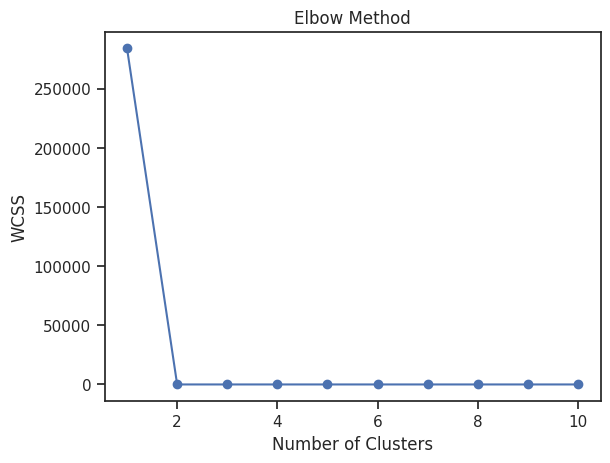

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

features = ['Kanker']

X = new_df[features]

# Penskalaan
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cari optimal dg Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Cari paling mendekati siku (++Lancip)
optimal_clusters = 3
# Jalankan K-Means++
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
new_df['Cluster'] = kmeans.fit_predict(X_scaled)


print("Cluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))
print("Clustered Data:")
print(new_df[['Wilayah','Kanker', 'Cluster']])

Cluster Centers:
[[2.29547284e-15]
 [1.00000000e+00]
 [0.00000000e+00]]
Clustered Data:
       Wilayah  Kanker  Cluster
0       KALBAR       0        0
1       KALBAR       0        0
2       KALBAR       0        0
3       KALBAR       0        0
4       KALBAR       0        0
...        ...     ...      ...
289795  JATENG       0        0
289796  KALSEL       0        0
289797  JATENG       0        0
289798  SUMSEL       0        0
289799   JABAR       0        0

[284045 rows x 3 columns]


In [ ]:
new_df[new_df['Cluster']==0]

,Wilayah,Diabetes Melitus,Cluster
0,KALBAR,0,0
1,KALBAR,0,0
2,KALBAR,0,0
3,KALBAR,0,0
4,KALBAR,0,0
...,...,...,...
289795,JATENG,0,0
289796,KALSEL,0,0
289797,JATENG,0,0
289798,SUMSEL,0,0


### Clustering 2 "Wilayah Diabetes Melitus"

In [ ]:
new_df = data[['Wilayah', 'Diabetes Melitus']]

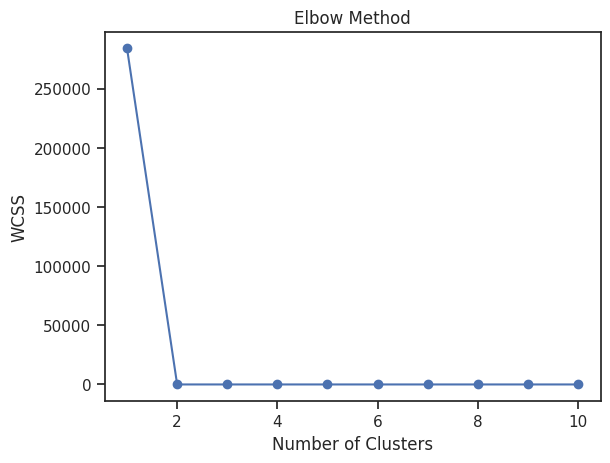

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

features = ['Diabetes Melitus']

X = new_df[features]

# Penskalaan
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cari optimal dg Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Cari paling mendekati siku (++Lancip)
optimal_clusters = 3
# Jalankan K-Means++
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
new_df['Cluster'] = kmeans.fit_predict(X_scaled)


print("Cluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))
print("Clustered Data:")
print(new_df[['Wilayah','Diabetes Melitus', 'Cluster']])

Cluster Centers:
[[-2.41993925e-14]
 [ 1.00000000e+00]
 [ 3.46944695e-18]]
Clustered Data:
       Wilayah  Diabetes Melitus  Cluster
0       KALBAR                 0        0
1       KALBAR                 0        0
2       KALBAR                 0        0
3       KALBAR                 0        0
4       KALBAR                 0        0
...        ...               ...      ...
289795  JATENG                 0        0
289796  KALSEL                 0        0
289797  JATENG                 0        0
289798  SUMSEL                 0        0
289799   JABAR                 0        0

[284045 rows x 3 columns]


##Klasifikasi

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Memisahkan fitur dan target
X = data[['Sex','BB','TB','Jantung','Stroke','Kanker','Ginjal', 'Tumor','Osteoartitris','Liver','TBC','HIV/AIDS','Gonore atau Sipilis','Tangan gemetar','Sering menangis','Dermatitis','Tidak bermanfaat','Kehilangan minat','Ingin mengakhiri hidup','Sirkulasi cukup']]
y = data['IMT']  # Ganti dengan kolom yang berisi label kelas Anda

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Logistic Regression
model = LogisticRegression(max_iter=1000)

# Melatih model
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi kinerja model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.2f}")

# Melihat laporan klasifikasi
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_reg = data[['Sex','BB','TB','Jantung','Stroke','Kanker','Ginjal', 'Tumor','Osteoartitris','Liver','TBC','HIV/AIDS','Gonore atau Sipilis','Tangan gemetar','Sering menangis','Dermatitis','Tidak bermanfaat','Kehilangan minat','Ingin mengakhiri hidup','Sirkulasi cukup']]
y_reg = data['IMT']

# Membagi data regresi menjadi data latih dan data uji
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Inisialisasi model regresi linear
regression_model = LinearRegression()

# Melatih model regresi pada data latih
regression_model.fit(X_reg_train, y_reg_train)

# Melakukan prediksi pada data uji regresi
y_reg_pred = regression_model.predict(X_reg_test)

# Evaluasi kinerja model regresi
mse = mean_squared_error(y_reg_test, y_reg_pred)
r2 = r2_score(y_reg_test, y_reg_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Memilih fitur dan target
X = data[['Sex','BB','TB','Jantung','Stroke','Kanker','Ginjal', 'Tumor','Osteoartitris','Liver','TBC','HIV/AIDS','Gonore atau Sipilis','Tangan gemetar','Sering menangis','Dermatitis','Tidak bermanfaat','Kehilangan minat','Ingin mengakhiri hidup','Sirkulasi cukup']]  # Ganti dengan fitur-fitur yang ingin digunakan
y = data['IMT']  # Ganti dengan kolom target klasifikasi

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model Random Forest
random_forest_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = random_forest_model.predict(X_test)

# Evaluasi kinerja model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.2f}")

# Melihat laporan klasifikasi
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))



```
# This is formatted as code
```

#Model Regresi Logistik Ordinal

In [ ]:
import pandas as pd
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Data UAS/preprocesseddata.csv', encoding='latin-1')
data.head()
import pandas as pd
# Pilih kolom-kolom yang diinginkan
selected_columns = ['Sex', 'IMT','BB', 'TB', 'Jantung', 'Stroke', 'Kanker', 'Ginjal', 'Tumor', 'Osteoartitris', 'Liver', 'TBC', 'HIV/AIDS', 'Gonore atau Sipilis', 'Tangan gemetar', 'Sering menangis', 'Dermatitis', 'Tidak bermanfaat', 'Kehilangan minat', 'Ingin mengakhiri hidup', 'Sirkulasi cukup']

# Buat DataFrame baru hanya dengan kolom-kolom yang dipilih
data_selected = data[selected_columns]

# Menampilkan DataFrame baru
print(data_selected)

In [ ]:
data_selected

In [ ]:
import pandas as pd

# Mengubah variabel kategorik menjadi variabel dummy
data_dummies = pd.get_dummies(data_selected, columns=['Sex','Jantung','Stroke','Kanker','Ginjal', 'Tumor','Osteoartitris','Liver','TBC','HIV/AIDS','Gonore atau Sipilis','Tangan gemetar','Sering menangis','Dermatitis','Tidak bermanfaat','Kehilangan minat','Ingin mengakhiri hidup','Sirkulasi cukup'], drop_first=True)

# Menampilkan DataFrame setelah variabel dummy
print(data_dummies)

In [ ]:
data_dummies.drop(columns=['Tangan gemetar_Tidak', 'Kehilangan minat_Tidak', 'Ingin mengakhiri hidup_Tidak', 'Sirkulasi cukup_Tidak ada sirkulasi udara','Sering menangis_Tidak',
                           'Tidak bermanfaat_Tidak'],inplace = True)

In [ ]:
data_dummies.info()

In [ ]:
# Menghapus baris 1 hingga 7
data_dummies.drop(data_dummies.index[0:8], inplace=True)

In [ ]:
data_dummies

In [ ]:
# Misalkan 'data' adalah dataframe yang berisi kolom 'IMT'
data_dummies['IMT'] = data_dummies['IMT'].map({'Sangat Kurus': 0, 'Kurus': 1, 'Normal': 2, 'Gemuk': 3, 'Obesitas': 4})

In [ ]:
data_dummies

In [ ]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Lakukan label encoding pada kolom 'IMT'
data_dummies['IMT_encoded'] = label_encoder.fit_transform(data_dummies['IMT'])

# Ganti kolom 'IMT' dengan kolom 'IMT_encoded'
data_dummies.drop('IMT', axis=1, inplace=True)
data_dummies.rename(columns={'IMT_encoded': 'IMT'}, inplace=True)

# Tampilkan DataFrame setelah perubahan
data_dummies

In [ ]:
X = data_dummies.drop(columns=['IMT'])
y = data_dummies['IMT']

In [ ]:
from mord import LogisticAT
from sklearn.model_selection import train_test_split

# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model regresi logistik ordinal
model = LogisticAT(alpha=1.0)

# Latih model dengan data latih
model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model (sesuaikan dengan metrik yang ingin Anda gunakan)
# Misalnya, jika ingin menghitung akurasi
accuracy = model.score(X_test, y_test)
print(f"Akurasi model: {accuracy}")

In [ ]:
from sklearn.preprocessing import RobustScaler
column_names = X.columns.tolist()
scaler = RobustScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=column_names)

In [ ]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
#build the model
data_dummies.reset_index(drop=True, inplace=True)
target = data_dummies['IMT']

prediktor = X

model_logit = OrderedModel(target, prediktor, distr='logit')

res_log = model_logit.fit(method='bfgs', disp=False)
res_log.summary()

##Insight Lain

In [ ]:
#Penyakit Kanker
pd.crosstab(data['Wilayah'], data['Kanker'], normalize = 'index')

Kanker,0,1
Wilayah,,
ACEH,0.999360,0.000640
BABEL,0.998011,0.001989
BALI,0.998235,0.001765
BANTEN,0.999175,0.000825
BENGKULU,0.998754,0.001246
DIY,0.997467,0.002533
GORONTALO,0.999517,0.000483
JABAR,0.998807,0.001193
JAMBI,0.999048,0.000952


In [ ]:
#Malaria
pd.crosstab(data['Wilayah'], data['Malaria'], normalize = 'index')

Malaria,0,1
Wilayah,,
ACEH,0.991555,0.008445
BABEL,0.839383,0.160617
BALI,0.987237,0.012763
BANTEN,0.998185,0.001815
BENGKULU,0.706205,0.293795
DIY,0.955678,0.044322
GORONTALO,0.969799,0.030201
JABAR,0.997325,0.002675
JAMBI,0.970644,0.029356


In [ ]:
cross_tab = pd.crosstab(data1['Jumlah karies'], data1['Frekuensi gosok gigi'])
cross_tab

Frekuensi gosok gigi,1 Kali,2 Kali,> 2 Kali,Tidak pernah
Jumlah karies,,,,
1 - 3 gigi karies/berlubang,2030,38609,13970,89
4 - 5 gigi karies/berlubang,448,5343,1468,16
> 6 gigi karies/berlubang,207,1699,422,18
Tidak diketahui,3989,137261,76855,1621


In [ ]:
pd.crosstab(data1['Sex'], data1['Diabetes Melitus'])

Diabetes Melitus,Tidak,Ya
Sex,,
LAKI - LAKI,256815,5627
PEREMPUAN,21255,348


In [ ]:
pd.crosstab(data1['Merokok'], data1['Frekuensi olahraga'])

Frekuensi olahraga,4 kali atau lebih dalam seminggu,Kurang dari 4 kali dalam seminggu,Tidak pernah
Merokok,,,
Tidak,62887,82219,4379
Ya,41863,86352,6345


In [ ]:
pd.crosstab(data1['Kelompok Umur'], data1['Sulit tidur'])


Sulit tidur,Kadang - kadang,Tidak,Ya
Kelompok Umur,,,
15 - 24,2994,34558,535
25 - 34,9146,55644,1803
35 - 44,20359,91472,3647
45 - 54,8272,41307,1263
55 - 64,2207,10217,347
≥ 65,54,210,10


In [ ]:
pd.crosstab(data1['Konsumsi buah dan sayur'], data1['IMT'])


IMT,Gemuk,Kurus,Normal,Obesitas,Sangat Kurus
Konsumsi buah dan sayur,,,,,
400gr/lebih,33074,410,73796,37021,4
Kurang dari 400gr,33212,473,62583,40824,7
Tidak pernah,572,23,1213,833,0


In [ ]:
pd.crosstab(data1['Terkontaminasi polusi udara'], data1['Sakit perut'])

Sakit perut,Kadang - kadang,Tidak,Ya
Terkontaminasi polusi udara,,,
Tidak,28035,226316,2085
Tidak tahu,3038,12261,224
Ya,1929,9876,281


In [ ]:
pd.crosstab(data1['Pendidikan Akhir'], data1['Jantung'], normalize='index')

Jantung,Tidak,Ya
Pendidikan Akhir,,
D3,0.983453,0.016547
S1,0.989395,0.010605
S2,0.986717,0.013283
S3,0.966667,0.033333
SMA,0.985459,0.014541
SMP,0.963118,0.036882
